<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [208]:
import pandas as pd
import numpy as np
import missingno as msno


import matplotlib.pyplot as plt
# import janitor as jn

from sklearn.dummy import DummyClassifier

from sklearn import(
    preprocessing, 
    tree,
    impute
)

from sklearn import metrics

from sklearn.metrics import (
    auc,
    confusion_matrix, 
    roc_auc_score, 
    roc_curve,
)
from sklearn.model_selection import ( 
    train_test_split,
    StratifiedKFold,
)

from sklearn.experimental import ( 
    enable_iterative_imputer
)

from yellowbrick.model_selection import ( 
    LearningCurve,
)

from yellowbrick.classifier import ( 
    ConfusionMatrix,
    ROCAUC,
)

import warnings
warnings.filterwarnings("ignore")

In [85]:
data = pd.read_csv('/Users/valentine/Desktop/projects/datasets/train_titanic.csv')

In [86]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
# Показывает в процентах пропущенные данные
data.isnull().mean()* 100

Survived       0.00000
Pclass         0.00000
Age           19.86532
SibSp          0.00000
Parch          0.00000
Fare           0.00000
Sex_male       0.00000
Embarked_Q     0.00000
Embarked_S     0.00000
dtype: float64

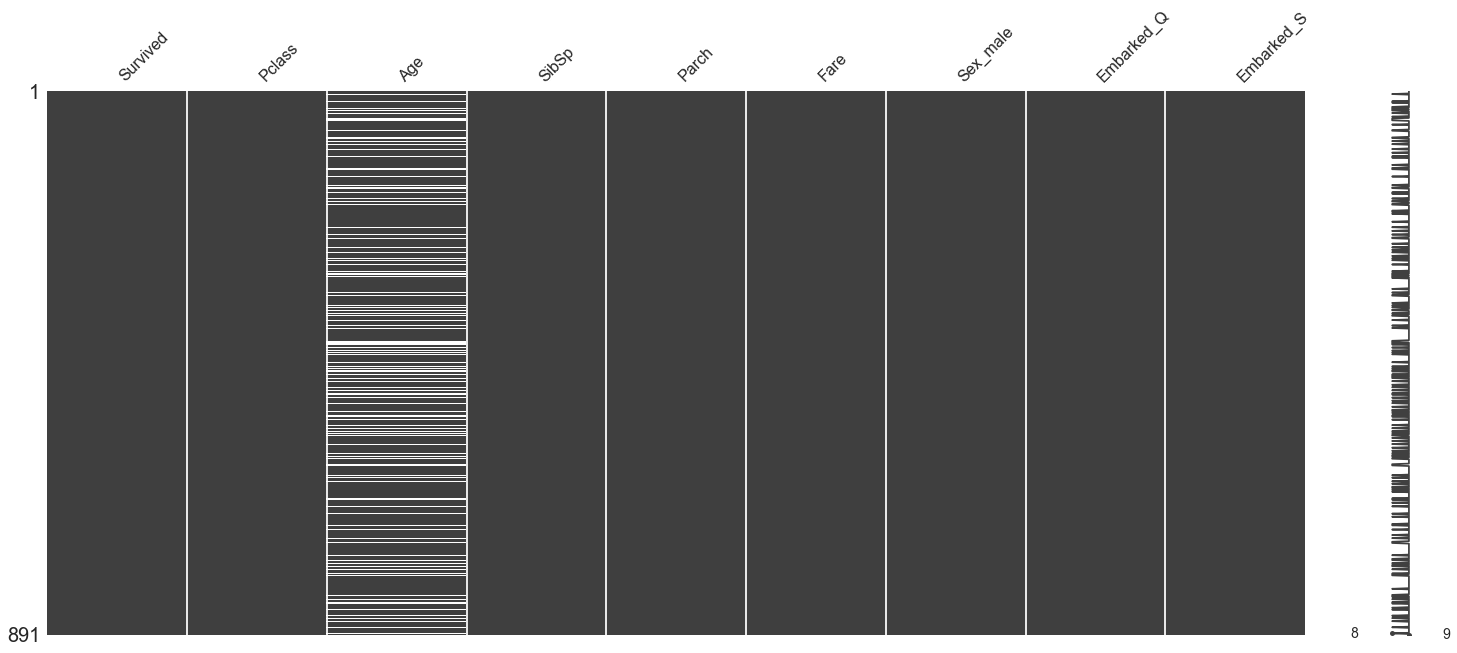

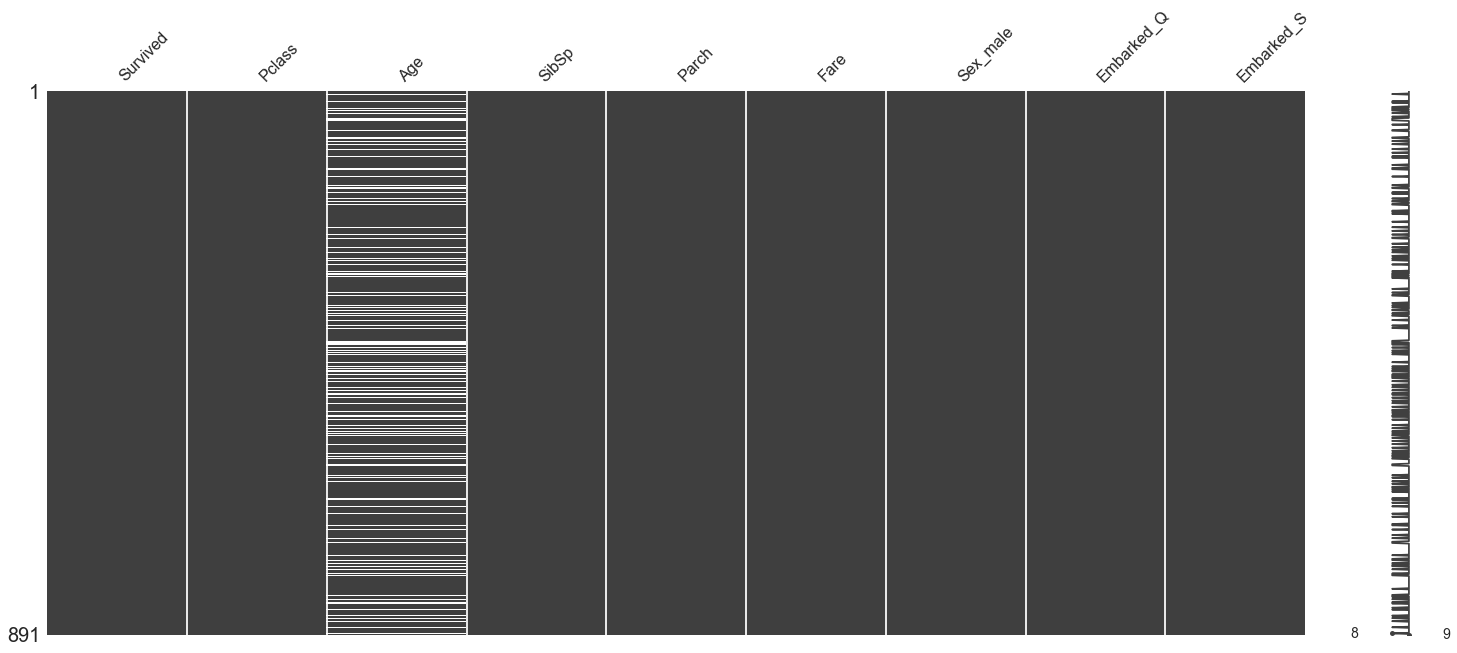

In [212]:
ax = msno.matrix(data)
ax.get_figure()

<AxesSubplot:>

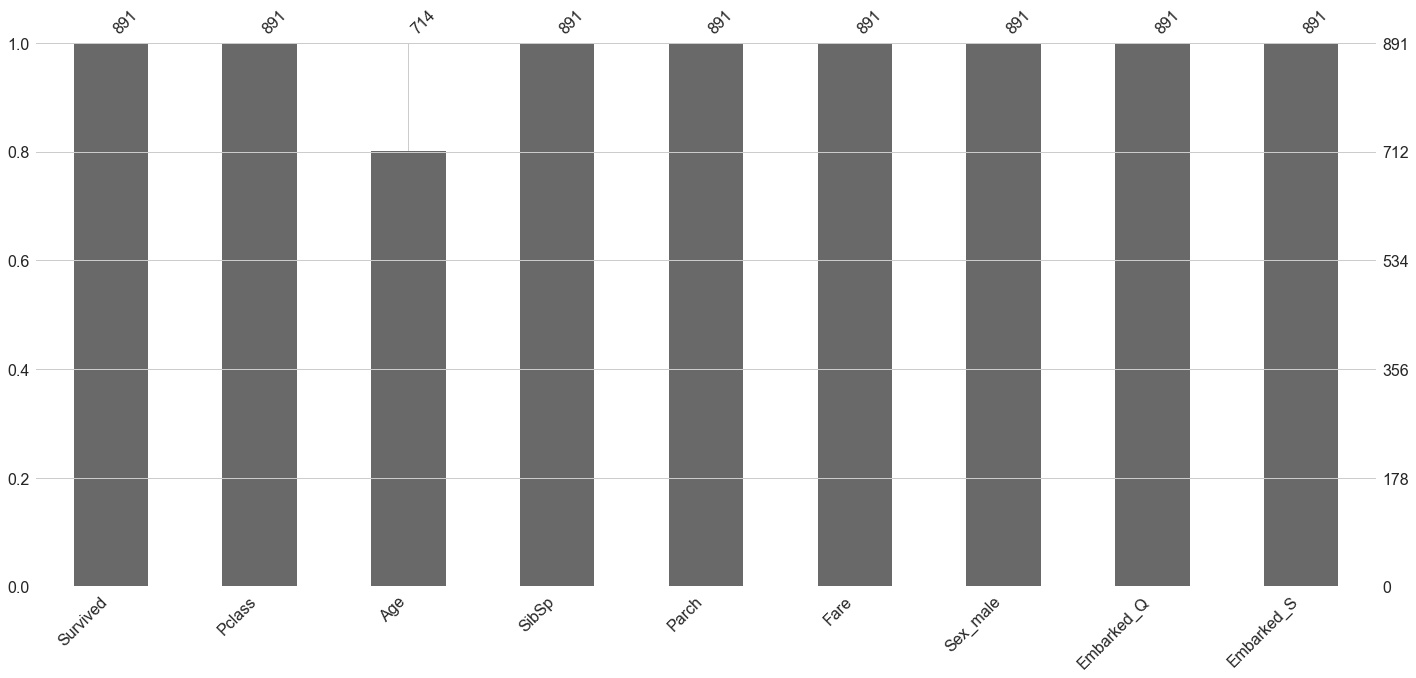

In [214]:
(1 - data.isnull().mean ()).abs().plot.bar()
msno.bar(data)

In [ ]:
# msno.heatmap(data)
# Показывает корреляцию пропущенных данных

In [87]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
base_col = data.columns

In [88]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [102]:
test_data = pd.read_csv('/Users/valentine/Desktop/projects/datasets/test_titanic.csv', usecols=base_col[1:])
test_data = pd.get_dummies(test_data, drop_first=True)
test_data.Age.fillna(test_data.Age.median(), inplace=True)
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)

In [103]:
X = data.drop('Survived', axis=True)
y = data['Survived']

In [104]:
X.Age.fillna(X.Age.median(),inplace=True)
num_col = X.columns
X.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [105]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=num_col)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.619306
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,-1.355574,-0.307562,0.619306
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,-1.355574,-0.307562,0.619306
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.737695,-0.307562,-1.614710


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3,random_state=42)

In [107]:
dm = DummyClassifier()
dm.fit(X_train, y_train)
dm.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


0.5272435897435898

In [112]:
metrics.precision_score(y_test, dm.predict(X_test))

0.3551020408163265

In [115]:
from sklearn import model_selection
from sklearn.dummy import DummyClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [125]:
for model in [DummyClassifier,
    LogisticRegression, 
    DecisionTreeClassifier,
    KNeighborsClassifier, 
    GaussianNB,
    SVC,
    RandomForestClassifier, 
    xgboost.XGBClassifier,
    ]:
    
    cls = model()
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    s = model_selection.cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
    print(f" {model.__name__:22} AUC: {s.mean():.3f} STD: {s.std(): .2f}")
    

 DummyClassifier        AUC: 0.479 STD:  0.04
 LogisticRegression     AUC: 0.848 STD:  0.03
 DecisionTreeClassifier AUC: 0.785 STD:  0.06
 KNeighborsClassifier   AUC: 0.845 STD:  0.04
 GaussianNB             AUC: 0.825 STD:  0.03
 SVC                    AUC: 0.858 STD:  0.04
 RandomForestClassifier AUC: 0.858 STD:  0.04
[11:51:59] WARNING: /private/var/folders/23/kp8g5yhx05qf9fjrh9p898240000gn/T/pip-install-bgwdvot2/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:52:00] WARNING: /private/var/folders/23/kp8g5yhx05qf9fjrh9p898240000gn/T/pip-install-bgwdvot2/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

In [129]:
from mlxtend.classifier import StackingClassifier
clfs = [
    x() 
    for x in [DummyClassifier,
    LogisticRegression, 
    DecisionTreeClassifier,
    KNeighborsClassifier, 
    GaussianNB,
    SVC,
    RandomForestClassifier, 
    xgboost.XGBClassifier,
    ]
]
stack = StackingClassifier(classifiers=clfs, meta_classifier=LogisticRegression())
kfold = model_selection.KFold(n_splits=10, random_state=42)
s = model_selection.cross_val_score(stack, X, y, scoring="roc_auc", cv=kfold)
print(f" {stack.__class__.__name__} AUC: {s.mean():.3f} STD: {s.std(): .2f}")

[11:58:05] WARNING: /private/var/folders/23/kp8g5yhx05qf9fjrh9p898240000gn/T/pip-install-bgwdvot2/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:58:06] WARNING: /private/var/folders/23/kp8g5yhx05qf9fjrh9p898240000gn/T/pip-install-bgwdvot2/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:58:07] WARNING: /private/var/folders/23/kp8g5yhx05qf9fjrh9p898240000gn/T/pip-install-bgwdvot2/xgboost/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

In [130]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [136]:
print(f'Среднее значение числа прогрозирования:{rf.score(X_test, y_test)}')
print(f'Точность модели: {metrics.precision_score(y_test, rf.predict(X_test))}')
print(f'Accuracy score: {metrics.accuracy_score(y_test, rf.predict(X_test))}') 

Среднее значение числа прогрозирования:0.7788461538461539
Точность модели: 0.7304347826086957
Accuracy score: 0.7788461538461539


In [143]:
rf2 = RandomForestClassifier()
params = {
        "max_features": [0.4, "auto"],
        "n_estimators": [15, 200], 
        "min_samples_leaf": [1, 0.1], 
        "random_state": [42],
}
cv = model_selection.GridSearchCV(rf2, params, n_jobs=-1)\
    .fit(X_train,y_train)
print(cv.best_params_)
    

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [160]:
rf3 = RandomForestClassifier(n_estimators=200,max_features="auto",min_samples_leaf=0.1,random_state=42, warm_start=True)
rf3.fit(X_train,y_train)
print(rf3.score(X_test, y_test))
print(metrics.precision_score(y_test, rf3.predict(X_test)))

0.7516025641025641
0.7572254335260116


In [217]:
y_pred = rf3.predict(X_test)
confusion_matrix(y_test, y_pred)


False

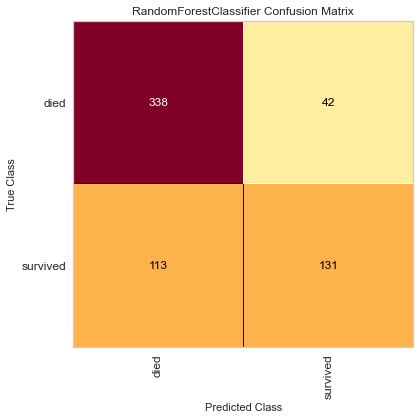

In [162]:
mapping = {0: "died", 1: "survived"}
fig, ax = plt.subplots(figsize=(6,6))
cm_viz = ConfusionMatrix(rf3, classes=["died", "survived"], label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof()
fig.savefig("confus_matr.png",dpi=300, bbox_inches="tight")

In [204]:
metrics.roc_auc_score(y_test, y_pred)
# Чем ближе к единице, тем более качественнее модель.
# Показывает соотношение TPR & TNR

0.7131794650560828

In [194]:
# roc_auc_viz = ROCAUC(rf3)
# roc_auc_viz.score()
# roc_auc_viz.poof()

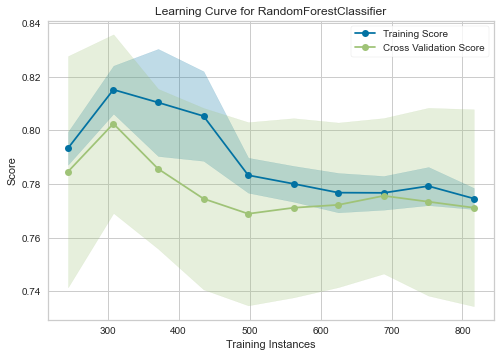

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [201]:
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    rf3,
    cv=cv, 
    train_sizes=sizes, 
    n_jobs=4,
)
lc_viz.fit(X, y)
lc_viz.poof()

In [221]:
import pickle
pic = pickle.dumps(rf3)
rf4 = pickle.loads(pic)
y_pred = rf4.predict(X_test)
roc_auc_score(y_test, y_pred)


0.7131794650560828